In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append("../")
sys.path.append("../..")

In [2]:
input_file = './data_miss_original.csv'
imputation_parameter ={
"imputation_method":[
    {
        "min":0,
        "max":1,
        "method":"mean"
    },
    {
        "min":2,
        "max":4,
        "method":"linear"
    },
    {
        "min":5,
        "max":10,
        "method":"brits"
    }
],
    "totalNanLimit":0.3
}

In [3]:
from KETIPrePartialDataPreprocessing.dataPreprocessing.dataIngestion import getData
input_data = getData().getFileInput(input_file, 'timedate')
test_data = input_data[:10000]
from KETIPrePartialDataPreprocessing.dataPreprocessing.partial_data_processing import partialDataProcessing
MDP = partialDataProcessing()
MDP.setData(test_data)
output_data = MDP.dataCleaning(imputation_parameter)

temp
-40 80
co2
0 99999
pm10
0 9999


14

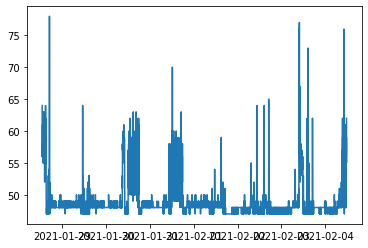

In [4]:
plt.plot(output_data['pm10'])
output_data['pm10'].isna().sum()

In [5]:
input_data['pm10'].isna().sum()

0